In [2]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pandas as pd
import numpy as np
from numpy import matmul, transpose, matrix, multiply, divide,sqrt,diag,log,pi
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import eigvals, eig
from scipy.special import gammaln
import sys
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from collections import Counter
%matplotlib inline  


In [3]:
df = pd.read_csv('/Users/mueric35/Desktop/Sentiment-and-Marktet-Analysis/GTdata/df_all_daily_raw.csv')
Y = matrix(df.iloc[:,1:])

In [4]:
name = list(df.columns)[1:]
date = df.iloc[:,0]

In [5]:
T,q = Y.shape
Y = transpose(Y)
Y[Y == 0] = 1
Y = log(Y)

In [6]:
Z = linkage(Y, 'ward')
c, coph_dists = cophenet(Z, pdist(Y,'correlation'))


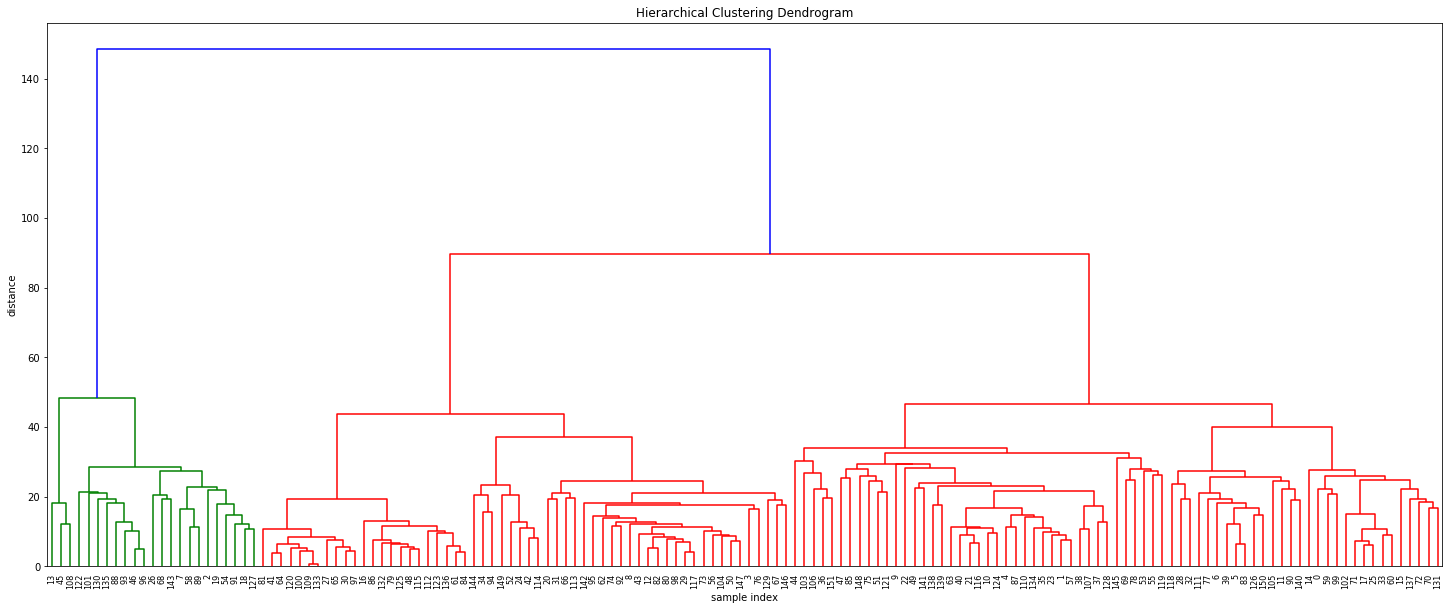

In [7]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Elbow Method


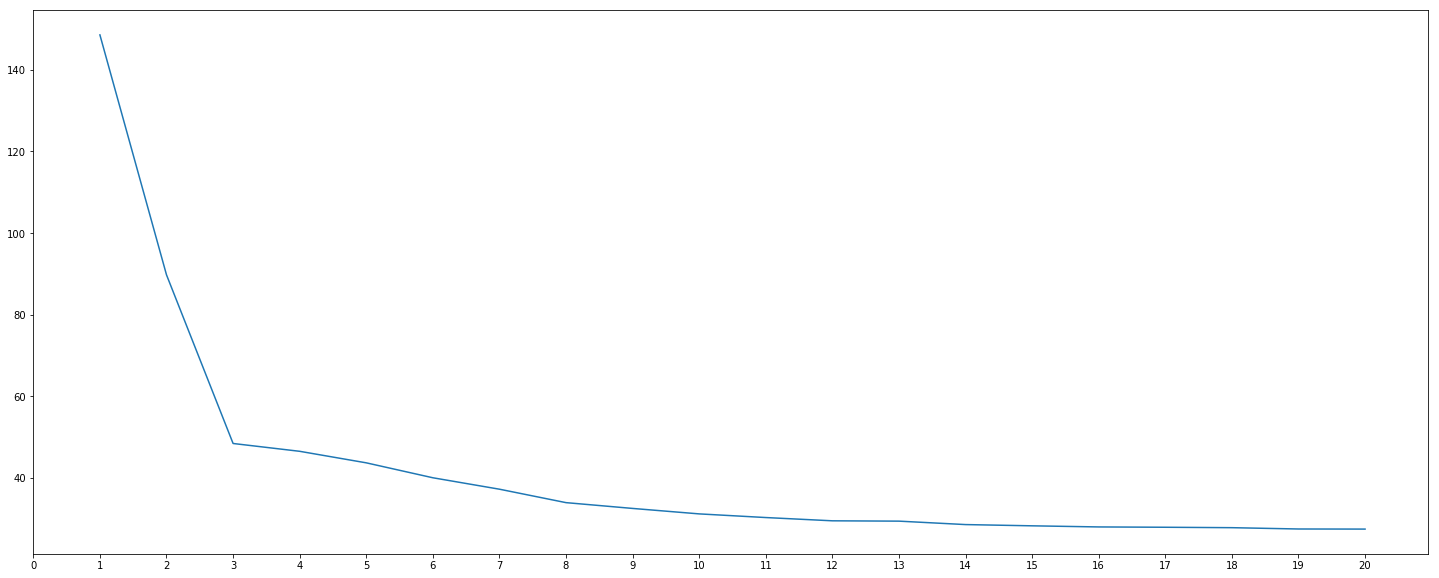

In [8]:
plt.figure(figsize=(25, 10))
last = Z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev);
plt.xticks(range(21))
print('Elbow Method')

In [11]:
name_cluster = {}
for i in range(len(name)):
    name_cluster.update({name[i]:fcluster(Z, 6, criterion='maxclust')[i]})

In [12]:
Counter(name_cluster.values())

Counter({1: 3, 2: 20, 3: 23, 4: 35, 5: 41, 6: 30})

In [13]:
name_cluster

{'1929': 6,
 '2008 financial crisis': 5,
 'affluenza': 5,
 'amazon fire': 5,
 'apple stock': 6,
 'associated press': 4,
 'bankruptcy': 6,
 'bargain hunt': 4,
 'berkeley county': 4,
 'berkeley electric': 5,
 'berkshire hathaway': 5,
 'berkshire hathaway stock': 5,
 'best buy': 3,
 'best buy best buy': 3,
 'best buy news': 5,
 'best buy stock': 5,
 'beyonce net worth': 5,
 'bill gates': 3,
 'bill gates net worth': 3,
 'bitcoin price': 5,
 'black booty': 5,
 'budget': 2,
 'budget deficit': 6,
 'bums': 4,
 'buy out': 5,
 'buzzfeed': 1,
 'campaign contributions': 2,
 'capitalism': 4,
 'celebrity net worth': 3,
 'citizens united': 5,
 'civil rights act of 1964': 6,
 'community bank': 6,
 'community first': 5,
 'community news': 6,
 'conservative': 4,
 'contributions': 5,
 'corruption': 3,
 'cost of healthcare': 5,
 'cost stock': 4,
 'craigslist': 3,
 'current events': 6,
 'debt': 4,
 'debt clock': 5,
 'debt ratio': 4,
 'deficit us': 2,
 'depression': 6,
 'donald trump net worth': 2,
 'dow': 

In [14]:
with open('cluster_result', 'wb') as handle:
    pickle.dump(name_cluster, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
cluster_index = {}
k = 3
for i in range(k):
    cluster_index.update({i:[index for index, value in enumerate(list(fcluster(Z, k, criterion='maxclust'))) if value == i+1]})

In [25]:
with open('cluster_index', 'wb') as handle:
    pickle.dump(cluster_index, handle, protocol=pickle.HIGHEST_PROTOCOL)